In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis import parcoords

# 3. Directed search: MORDM Generating alternatives

In this file the MOEA optimization algorithm is used to search through the lever space of the model in order to find promising policies (candidate strategies) to reach the defined objectives. The objectives are defined in problem_formulation.py and all aim to minimize the specified outcomes. The reference scenario is defined based on the open exploration and represents a "worst-case" scenario. This scenario, as explained in the first part of this notebook, is used by the MOEA algorithm to find candidate solutions in the 2_MORDM_MOEA file.

This notebook has the following structure:
1. Determining reference scenario
2. Importing generated files
2. Assessing convergence of the algorithm
3. Parallel coordinate plot of original results
4. Selecting policies of interest
5. Parallel coordinate plot of policies of interest

Description of this notebook can be found in chapter 3.2.2 of the report.

In [4]:
# Import problem formulation
from problem_formulation import get_model_for_problem_formulation

# Define problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(2)

## 1. Determining reference scenario
The reference scenario follows from the open exploration of the model for 20.000 scenarios without any applied policy, performed in 1_open_exploration_zero_policy.py. The open exploration showed that not taking any action results in the highest damages. This leads to use of these outcomes for the selection of the reference scenario. The combination of uncertainty values that result in the highest number of expected annual deaths and highest expected annual damage is selected as the reference scenario of the MOEA.

In [5]:
#Import CSV files
experiments_zero = pd.read_csv('data/output_data/OE_experiments_zero.csv')
outcomes_zero = pd.read_csv('data/output_data/OE_outcomes_zero.csv')

Based on the generated dataframes, a selection is made of the 10% highest expected annual damages and deaths. This dataframe will be used to give insights in the number of scenarios that reach this threshold.

In [18]:
# Define dataframe with highest expected annual damage and deaths
worst_outcomes = outcomes_zero[
    (outcomes_zero['Expected Annual Damage'] >
       np.percentile(outcomes_zero['Expected Annual Damage'],90))
    & (outcomes_zero['Expected Number of Deaths'] >
       np.percentile(outcomes_zero['Expected Number of Deaths'],90))
]
worst_outcomes

,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
33,33,5.198803e+09,0,0.0,0.0,4.890480,policy zero
100,100,5.136015e+09,0,0.0,0.0,5.339259,policy zero
121,121,4.691483e+09,0,0.0,0.0,3.791816,policy zero
122,122,6.017659e+09,0,0.0,0.0,5.027354,policy zero
143,143,3.513066e+09,0,0.0,0.0,3.831034,policy zero
...,...,...,...,...,...,...,...
19877,19877,3.589782e+09,0,0.0,0.0,4.150495,policy zero
19892,19892,4.561513e+09,0,0.0,0.0,3.754350,policy zero
19901,19901,6.247524e+09,0,0.0,0.0,5.502276,policy zero
19957,19957,4.781189e+09,0,0.0,0.0,4.949853,policy zero


Of the original 20.000 scenarios, 732 result in high expected annual damages and evacuation costs. Next these outcomes are merged with their corresponding experiment values. This dataframe is sorted to descend, based on the expected number of deaths and damages.

In [12]:
# Merge dataframes
combined_worstoutcomes = pd.merge(worst_outcomes, experiments_zero,
                                  left_index=True, right_index=True)

# Sort dataframe
combined_worstoutcomes.sort_values(by=['Expected Number of Deaths',
                                       'Expected Annual Damage'],
                                        ascending =False)

,Unnamed: 0_x,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy_x,Unnamed: 0_y,A.0_ID flood wave shape,A.1_Bmax,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy_y,model
16076,16076,5.684293e+09,0,0.0,0.0,6.090304,policy zero,16076,104,107.338439,...,0,0,0,0,0,0,0,16076,policy zero,dikesnet
547,547,5.294605e+09,0,0.0,0.0,6.030020,policy zero,547,78,74.599284,...,0,0,0,0,0,0,0,547,policy zero,dikesnet
16620,16620,4.322621e+09,0,0.0,0.0,5.988701,policy zero,16620,121,41.863103,...,0,0,0,0,0,0,0,16620,policy zero,dikesnet
14173,14173,5.439709e+09,0,0.0,0.0,5.971139,policy zero,14173,70,165.830966,...,0,0,0,0,0,0,0,14173,policy zero,dikesnet
745,745,4.658382e+09,0,0.0,0.0,5.883481,policy zero,745,126,91.695046,...,0,0,0,0,0,0,0,745,policy zero,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,11943,3.887427e+09,0,0.0,0.0,3.702210,policy zero,11943,36,69.997401,...,0,0,0,0,0,0,0,11943,policy zero,dikesnet
4327,4327,4.576691e+09,0,0.0,0.0,3.698140,policy zero,4327,30,74.337607,...,0,0,0,0,0,0,0,4327,policy zero,dikesnet
11136,11136,3.824903e+09,0,0.0,0.0,3.693429,policy zero,11136,35,299.463710,...,0,0,0,0,0,0,0,11136,policy zero,dikesnet
6989,6989,5.003126e+09,0,0.0,0.0,3.691398,policy zero,6989,60,97.863210,...,0,0,0,0,0,0,0,6989,policy zero,dikesnet


Scenario 16076, evaluated with no policies, results in expected number of deaths of 6.09 and expected annual damages of more than 5.6 billion euros. The uncertainty values of this scenario are used as reference in 2_MORDM_MOEA.py.

In [17]:
# Select and print uncertainty values of the reference scenario
combined_worstoutcomes.loc[16076,'A.0_ID flood wave shape':'discount rate 2']

A.0_ID flood wave shape           104
A.1_Bmax                   107.338439
A.1_Brate                         1.5
A.1_pfail                    0.327612
A.2_Bmax                     36.22951
A.2_Brate                         1.0
A.2_pfail                    0.067184
A.3_Bmax                    203.73302
A.3_Brate                         1.5
A.3_pfail                    0.099837
A.4_Bmax                    36.591975
A.4_Brate                        10.0
A.4_pfail                    0.957634
A.5_Bmax                     179.7911
A.5_Brate                        10.0
A.5_pfail                    0.017638
discount rate 0                   4.5
discount rate 1                   3.5
discount rate 2                   1.5
Name: 16076, dtype: object

The selected reference scenario is based the flood wave shape 104 and relies on different maximum breach widths and chances of dike failure in each dike ring. Large differences are found in the Brate, indicating how fast the breach grows over time.



## 2. Importing generated files

The MOEA used in 2_MORDM_MOEA.py uses the $\epsilon$-NSGA2 algorithm and 10000 NFEs. The epsilons are set to a list of length equal to the number of outcomes: [1e3] * len(model.outcomes)*. The convergence of the model is tracked with epsilon progress.

The csv files containing results and convergence data that were created in 2_MORDM_MOEA.py are imported and shortly explored.

In [14]:
# Import CSV files generated in dike_model_optimization
results = pd.read_csv('data/output_data/MOEA_results_10000nfe.csv')
convergence = pd.read_csv('data/output_data/MOEA_convergence_10000nfe.csv')

In [15]:
# Print results
results

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,0,1,0,0,0,0,1,1,0,...,2,6,9,0,0,1.252760e+07,3.415027e+08,2.672000e+08,430.301189,0.001806
1,1,0,0,0,0,0,0,1,0,0,...,4,2,10,3,3,3.682104e+05,5.915904e+08,1.519000e+08,29.444865,0.000065
2,2,0,1,0,0,1,1,1,1,1,...,6,1,9,0,3,0.000000e+00,2.633004e+08,1.110800e+09,0.000000,0.000000
3,3,0,1,1,0,0,0,1,1,1,...,6,5,7,0,1,0.000000e+00,3.245990e+08,6.249000e+08,0.000000,0.000000
4,4,0,1,0,0,1,1,1,1,1,...,6,1,9,0,3,0.000000e+00,2.959953e+08,8.547000e+08,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,2.130889e+07,2.400674e+08,2.424000e+08,670.530947,0.007577
276,276,1,0,0,0,0,0,1,1,0,...,3,2,7,0,0,6.250959e+08,1.403299e+08,1.460000e+08,18580.030101,0.202364
277,277,1,1,0,0,0,0,1,0,1,...,0,2,5,3,0,2.834672e+07,1.920416e+08,4.730000e+08,0.000000,0.042509
278,278,0,0,1,0,0,0,1,0,0,...,1,2,7,1,0,8.880329e+07,2.624377e+08,1.153000e+08,0.000000,0.127595


The *results* dataframe includes 280 rows and 37 columns. This indicates that there are 280 strategies, combinations of levers, found that are pareto optimal conditional on the defined reference scenario. Each of these strategies have their own tradeoffs. This will later be explored with a parallel coordinate plot.

In [16]:
# Print convergence
convergence

,Unnamed: 0,epsilon_progress,nfe
0,0,0,0
1,1,37,100
2,2,351,1194
3,3,549,2287
4,4,709,3381
5,5,829,4477
6,6,937,5569
7,7,1011,6666
8,8,1076,7761
9,9,1140,8853


The *convergence* dataframe includes the epsilon progress on 9 generations. This information can be used to check if the MOEA has converged to the optimum solutions.

## 3. Convergence of the algorithm

The convergence of the algorithm can be evaluated with multiple convergence metrics. In this notebook only the epsilon progress is used. The epsilon progress indicates how often a solution in a new grid cell is found, this should stabilize as the algorithm converges.

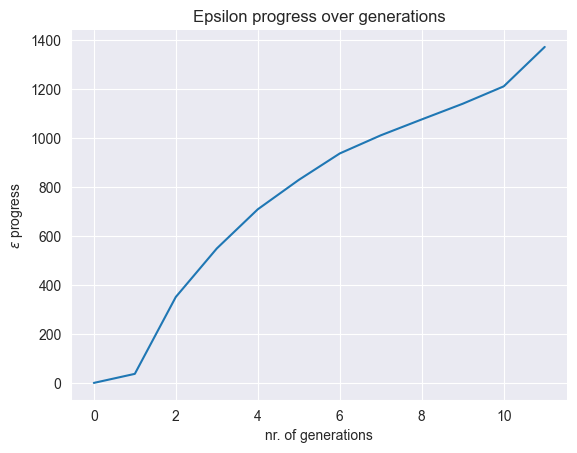

In [12]:
# Make a plot of the epsilon progress
fig, ax = plt.subplots(ncols=1)

ax.plot(convergence.epsilon_progress)
ax.set_xlabel("nr. of generations")
ax.set_ylabel(r"$\epsilon$ progress")
ax.set_title("Epsilon progress over generations")

sns.despine()
plt.show()

Visualising the epsilon progress over generations indicates that the algorithm has not yet stabilized. This indicates that the number of function evaluations (NFEs) has not been sufficient. Due to time constraints it has been chosen not to increase the number of NFEs and see the minimal convergence as a limitation.

### 3. Parallel coordinate plot
Parallel coordinate plots show the tradeoffs of the 280 solutions that were found by the algorithm.

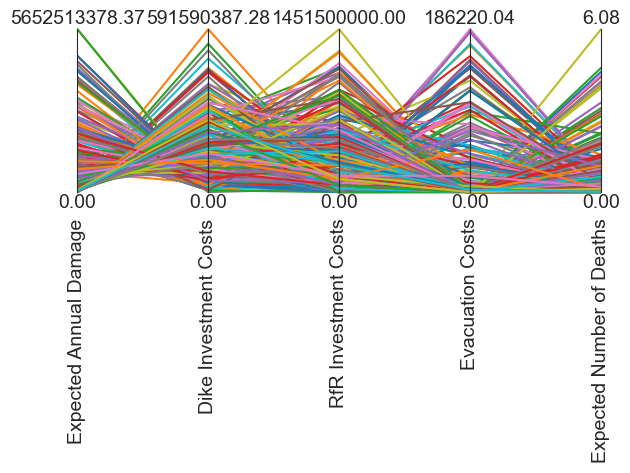

In [20]:
# Get objectives from results dataframe
data = results.loc[:, [o.name for o in dike_model.outcomes]]

# Define limits based on results dataframe
limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Expected Number of Deaths',
               'Dike Investment Costs', 'RfR Investment Costs',
               'Evacuation Costs']] = 0

# Set axes of parallel coordinate plots
paraxes = parcoords.ParallelAxes(limits)

# Plot data on axis
paraxes.plot(data)

plt.show()

Plotting all 280 solutions results in a cluttered visualisation of the tradeoffs. It can be seen that the pareto optimal solutions found result in large ranges of outcomes. These ranges can be limited in order to come to selection of suitable policies.

### 5. Selecting policies of interest
The outcomes of interest that are found by the MOEA algorithm have large ranges of outcomes. More insight in these ranges can be created by looking into the descriptive data of the outcomes.

In [21]:
# Select only outcomes of MOEA
outcomes_MOEA = results.loc[:, [o.name for o in dike_model.outcomes]]

# Print descriptives
outcomes_MOEA.describe()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
count,2.800000e+02,2.800000e+02,2.800000e+02,280.000000,280.000000
mean,1.144116e+09,1.387776e+08,3.238489e+08,22456.218760,0.746693
std,1.221971e+09,1.103149e+08,3.094572e+08,42186.126106,1.050623
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.389516e+08,5.531660e+07,6.140000e+07,0.000000,0.058255
50%,6.786319e+08,1.100847e+08,2.365000e+08,0.000000,0.280016
75%,1.911903e+09,1.817188e+08,4.953750e+08,24177.718299,1.024781
max,5.652513e+09,5.915904e+08,1.451500e+09,186220.037953,6.075804


The descriptives of the MOEA outcomes reveal that for all outcomes, the minimum value is zero. This is another sign that there are tradeoffs to be made, as minimal annual damage possibily cannot be reached without any investment. In selecting policies, the expected number of deaths and RfR investment costs are taken into account. The expected number of deaths ranges from 0 to 6.07, this large number is undesirable as minimizing casualties is a priority. This results in selecting policies with less than 0.001 expected casualties.

In [22]:
selected_policies = results[(results['Expected Number of Deaths']  < 0.001)]
selected_policies

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
1,1,0,0,0,0,0,0,1,0,0,...,4,2,10,3,3,3.682104e+05,5.915904e+08,1.519000e+08,29.444865,0.000065
2,2,0,1,0,0,1,1,1,1,1,...,6,1,9,0,3,0.000000e+00,2.633004e+08,1.110800e+09,0.000000,0.000000
3,3,0,1,1,0,0,0,1,1,1,...,6,5,7,0,1,0.000000e+00,3.245990e+08,6.249000e+08,0.000000,0.000000
4,4,0,1,0,0,1,1,1,1,1,...,6,1,9,0,3,0.000000e+00,2.959953e+08,8.547000e+08,0.000000,0.000000
8,8,0,1,0,0,1,0,1,1,1,...,4,2,10,4,0,0.000000e+00,3.917942e+08,5.157000e+08,0.000000,0.000000
63,63,0,0,0,0,0,0,0,0,0,...,1,3,9,3,0,1.071303e+06,4.397768e+08,2.424000e+08,85.590794,0.000189
64,64,1,0,0,0,0,0,1,0,1,...,4,2,10,0,0,0.000000e+00,3.934058e+08,2.672000e+08,0.000000,0.000000
69,69,0,0,0,0,0,0,1,0,1,...,3,5,10,0,0,0.000000e+00,4.853358e+08,1.826000e+08,0.000000,0.000000
136,136,0,0,0,0,1,1,1,1,1,...,5,2,9,0,0,0.000000e+00,2.810343e+08,1.026200e+09,0.000000,0.000000
218,218,1,0,0,0,0,1,1,0,1,...,4,7,7,7,0,4.136631e+06,2.440544e+08,6.062000e+08,312.154572,0.000847


Limiting policies of interest to be below the expected number of deaths threshold results in 12 policies of interest. This number is further reduced based on the RfR investment costs.

The investment limitation is based on the total budget/spending on the Room for the River project. [Rijkswaterstaat](https://www.rijkswaterstaat.nl/water/waterbeheer/bescherming-tegen-het-water/maatregelen-om-overstromingen-te-voorkomen/ruimte-voor-de-rivieren) states that the total budget was 2.3 billion euros, divided over 39 different measures. Nine measures were excecuted on the IJssel river, resulting in an assumption of allocated budget of 530 million euros for the RfR investment costs on the IJssel River.

In [24]:
#Gelimiteerd budget for RfR investment costs aangehouden
selected_policies = results[(results['Expected Number of Deaths']  < 0.001) & (results['RfR Investment Costs'] < 530e6)]
selected_policies

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
1,1,0,0,0,0,0,0,1,0,0,...,4,2,10,3,3,3.682104e+05,5.915904e+08,151900000.0,29.444865,0.000065
8,8,0,1,0,0,1,0,1,1,1,...,4,2,10,4,0,0.000000e+00,3.917942e+08,515700000.0,0.000000,0.000000
63,63,0,0,0,0,0,0,0,0,0,...,1,3,9,3,0,1.071303e+06,4.397768e+08,242400000.0,85.590794,0.000189
64,64,1,0,0,0,0,0,1,0,1,...,4,2,10,0,0,0.000000e+00,3.934058e+08,267200000.0,0.000000,0.000000
69,69,0,0,0,0,0,0,1,0,1,...,3,5,10,0,0,0.000000e+00,4.853358e+08,182600000.0,0.000000,0.000000


Limiting the RfR investment costs results in five different policies of interest that, in case of the defined reference scenario, have a minimized expected number of deaths and limited RfR investment costs. The selected policies are saved to a csv file.

In [25]:
# Write selected policies to csv
selected_policies.to_csv('data/output_data/MOEA_selected_policies_with_outcomes.csv')

### 6. Parallel coordinate plot of policies of interest
The five selected policies are evaluated in a parallel coordinate plot. This gives insights in the tradeoffs.

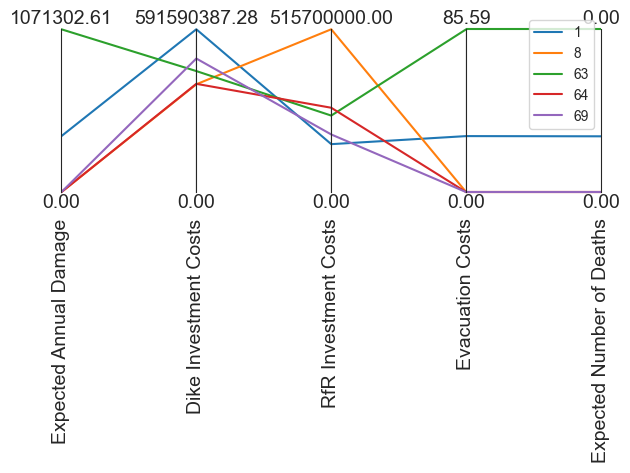

In [29]:
# Get objectives from results dataframe
data = selected_policies.loc[:, [o.name for o in dike_model.outcomes]]

# Define limits based on results dataframe
limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Expected Number of Deaths',
               'Dike Investment Costs', 'RfR Investment Costs',
               'Evacuation Costs']] = 0

# Set axes of parallel coordinate plots
paraxes = parcoords.ParallelAxes(limits)

# Plot data on axis
paraxes.plot(data)
plt.legend(data.index)
plt.show()

The parallel coordinate plot visualises the ranges of outcomes and the possible tradeoffs between them. A first glance reveals that general tradeoffs between outcomes are also contradicted. Lower expected annual damages seems to be a tradeoff for dike investment costs, but this is contradicted by policy 63. What is clear is that all policies require some dike and RfR investment costs, and that there are tradeoffs between the different policies.

Policy 8 seems to be promising, with extremely low expected annual damages, deaths and evacuation costs. However, its performance is now only evaluated to one reference scenario. The next step in analysis will be to evaluate the policies under a large number of uncertainties.

The policies found in the dataframe selected_policies are saved to a CSV file. The 'Unnamed:0' is renamed to selected_policy to preserve the original index number in the list of policies found by the MOEA.

In [30]:
# Drop results columns
policies = selected_results.drop(['Expected Annual Damage',
                                  'Dike Investment Costs',
                                  'RfR Investment Costs',
                                  'Evacuation Costs',
                                  'Expected Number of Deaths',
                                  ], axis=1)

# Rename Unnamed: 0 to selected_policy
policies.rename(columns= {'Unnamed: 0': 'selected_policy'}, inplace=True)

# Save selected policies to csv
policies.to_csv('data/output_data/MOEA_selected_policies.csv')


### Conclusion
Based on a reference scenario, the MOEA algorithm found 280 policies. These policies were evaluated based on their performance in outcomes expected number of deaths and RfR investment costs. This results in the selection of five different policies. The performance under different uncertainties will be evaluated in the next step of the MORDM.